We want to plot the 3 run results against our calibrated value for murc

In [50]:
import numpy as np
import pandas as pd
import pickle
import os
import glob
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)
matplotlib.rc('axes',labelsize=25) 
matplotlib.rcParams['text.usetex'] = False

__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/'
__datdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/data/KepxDR2/'

In [77]:
def readresults(band):
    odf = pd.DataFrame()
    if band == 'K':
        for teff in [-70.0, -80.0, -90.0, -100.0, -110.0]:
            loc = __outdir__+'APOKASC_K_tempscale_Clump/astero_'+str(teff)+'_pars.csv'
            df = pd.read_csv(loc, index_col=0)
            df.rename(index={0:teff}, inplace=True)
            odf = odf.append(df)
    if band == 'G':
        for teff in [-40.0, -50.0, -60.0, -70.0, -80.0]:
            loc = __outdir__+'APOKASC_GAIA_tempscale_Clump/astero_'+str(teff)+'_pars.csv'
            df = pd.read_csv(loc, index_col=0)
            df.rename(index={0:teff}, inplace=True)
            odf = odf.append(df)

    return odf

In [78]:
K = readresults('K')
G = readresults('G')

Lets plot the results compared to our expected values

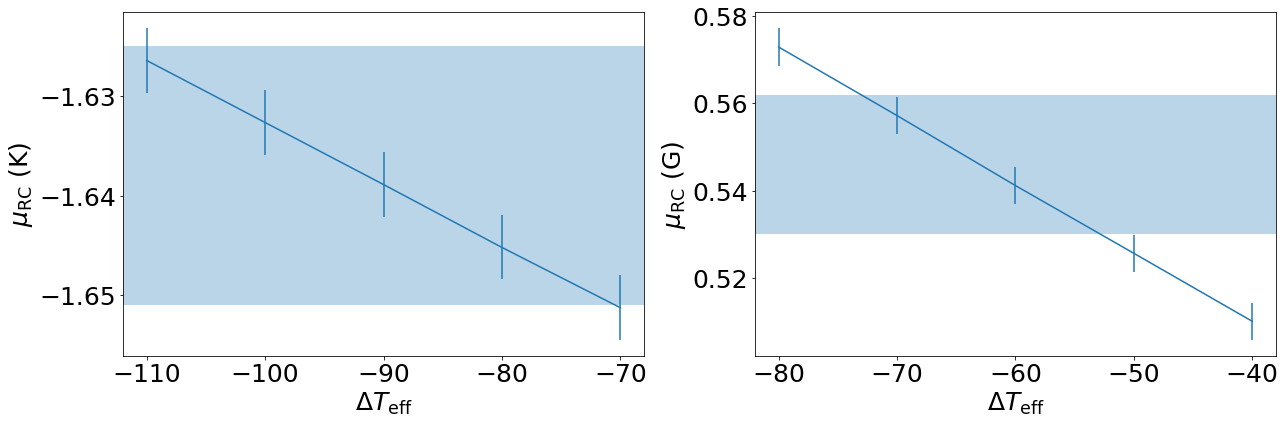

In [79]:
murck = -1.638
sigmurck = 0.013
murcg = 0.546
sigmurcg = 0.016

fig, ax = plt.subplots(1,2, figsize=(18, 6))
ax[0].errorbar(K.index.values, K.mu.values, yerr=K.mu_std.values, label='K')
ax[0].axhspan(murck-sigmurck, murck+sigmurck, label='Calibration region',alpha=.3)
ax[0].set_ylabel(r'$\mu_{\rm RC}$ (K)')
ax[0].set_xlabel(r'$\Delta T_{\rm eff}$')

ax[1].errorbar(G.index.values, G.mu.values, yerr=G.mu_std.values, label='K')
ax[1].axhspan(murcg-sigmurcg, murcg+sigmurcg, label='Calibration region',alpha=.3)
ax[1].set_ylabel(r'$\mu_{\rm RC}$ (G)')
ax[1].set_xlabel(r'$\Delta T_{\rm eff}$')
fig.tight_layout()
plt.show()

Using our values for the position of the RC in the $K$ and $G$ bands from Gaia DR2, we find them compatible with a shift in temperature scale applied to APOKASC-2 stars of between -110K and -70K for the $K$ band, and -70K to -50K for the $G$ band, implying that a global shift of -70K is most appropriate for this sample